In [1]:
import os
from dotenv import load_dotenv

from src.utils import read_yaml


load_dotenv()


# os.environ['GOOGLE_API_KEY'] = os.getenv('GEMINI_API_KEY')
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

config = read_yaml('config.yaml')
config

{'llm': {'provider': 'groq',
  'settings': {'temperature': 1.0, 'max_tokens': 128}},
 'tools': {'search': {'provider': 'tavily',
   'settings': {'max_results': 5, 'search_depth': 'basic'}}}}

In [2]:
from src.rewoo_graph import ReWOOGraph

rewoo = ReWOOGraph(config=config)
rewoo

In [3]:
graph = rewoo.build_graph()
graph

CompiledStateGraph(nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden'], 'metadata': {}, 'configurable': {}}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<task,plan_string,steps,results,result>(recurse=True, writes=[ChannelWriteEntry(channel='task', value=<object object at 0x79e70a6515d0>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='plan_string', value=<object object at 0x79e70a6515d0>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='steps', value=<object object at 0x79e70a6515d0>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='results', value=<object object at 0x79e70a6515d0>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='result', value=<object object at 0x79e70a6515d0>, skip_none=False, mapper=_get_state_key(recurse=False))], require_at_least_one_of=['task', 'plan_string', 'steps', 'results', 'result

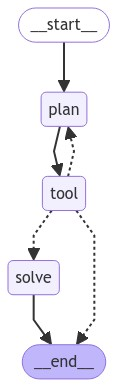

In [12]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

graph_visual = Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
display(
    graph_visual
)

In [4]:
task = "what is the hometown of the 2024 australian open winner"

In [15]:
for s in graph.stream({"task": task}):
    print(s)
    print("---")

{'plan': {'plan_string': 'Plan: Use Google to find out who the 2024 Australian Open winner is, as their hometown is not yet known. #E1 = Google[2024 Australian Open winner]\nPlan: Utilize LLM to determine the name of the 2024 Australian Open winner from the search results. #E2 = LLM[Who is the winner of the 2024 Australian Open, given #E1?]\nPlan: Perform another Google search to find out the hometown of the identified winner. #E3 = Google[Hometown of #E2', 'steps': [('Use Google to find out who the 2024 Australian Open winner is, as their hometown is not yet known. ', '#E1', 'Google', '2024 Australian Open winner'), ('Utilize LLM to determine the name of the 2024 Australian Open winner from the search results. ', '#E2', 'LLM', 'Who is the winner of the 2024 Australian Open, given #E1?')]}}
---
{'tool': {'results': {'#E1': '[{\'url\': \'https://www.vogue.com/article/jannik-sinner-wins-first-grand-slam-2024-australian-open\', \'content\': \'Jannik Sinner Steals His First Grand Slam at t